In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./PCA_Dataset_Iris_Flowers.csv")
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [4]:
# spliting the data into input features and labels
X = df.drop(['species'], axis=1) # input features
y = df['species'] # labels

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize the input features
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [9]:
# Calculate the covariance matrix 
# Covariance matrix: C = E[(X - E[X])(X - E[X])^T]
features = X_scaled.T  # transpose the features to get shape (n_features, n_samples)
cov_matrix = np.cov(features)

cov_matrix[:5]

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [11]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix
values, vectors = np.linalg.eig(cov_matrix)

print(values[:5])
print(vectors[:5])

[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [12]:
# explained variance of a feature is a measure of how much of the total variance in the data is explained by that feature. 
# It is calculated as the ratio of the variance of the feature to the total variance of the data, multiplied by 100.

explained_variances = []
for i in range(len(values)):
    explained_variances.append((values[i] / np.sum(values))*100)

print("explained varience of each feature : ", explained_variances)

explained varience of each feature :  [72.96244541329987, 22.850761786701774, 3.668921889282877, 0.51787091071548]


Text(0, 0.5, 'percentange of explained variance')

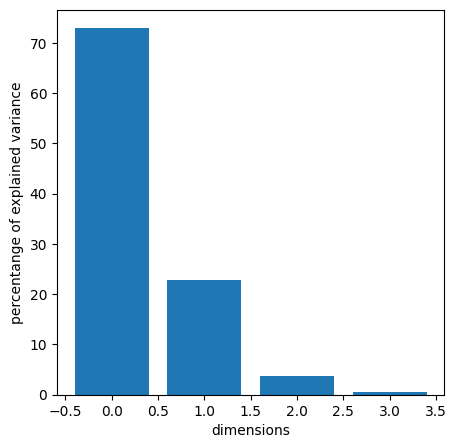

In [18]:
import matplotlib.pyplot as plt

# bar plot of the explained variance of each feature. The x-axis of the plot represents the dimensions (i.e., features), and the y-axis represents the percentage of explained variance.

# The bar function from Matplotlib's pyplot module is used to create the bar plot. The range(4) argument specifies the x-coordinates of the bars, and the explained_variances argument specifies the heights of the bars. The alpha parameter specifies the transparency of the bars.

# The ylabel and xlabel functions are used to label the y-axis and x-axis of the plot, respectively.

plt.figure(figsize=(5,5))
plt.bar(range(4), explained_variances)
plt.xlabel("dimensions")
plt.ylabel("percentange of explained variance")

In [20]:
# The input features (X_scaled) are multiplied by the transpose of the eigenvector matrix (vectors.T), which gives the projections of the features onto the PCs.
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])

# projections are then added to a Pandas data frame with the labels (y) using the res data frame.
res = pd.DataFrame(projected_1, columns = ['PC1'])
res['PC2'] = projected_2
res['Y'] = y

res.head()


,PC1,PC2,Y
0,-2.264703,-0.480027,1
1,-2.080961,0.674134,1
2,-2.364229,0.341908,1
3,-2.299384,0.597395,1
4,-2.389842,-0.646835,1


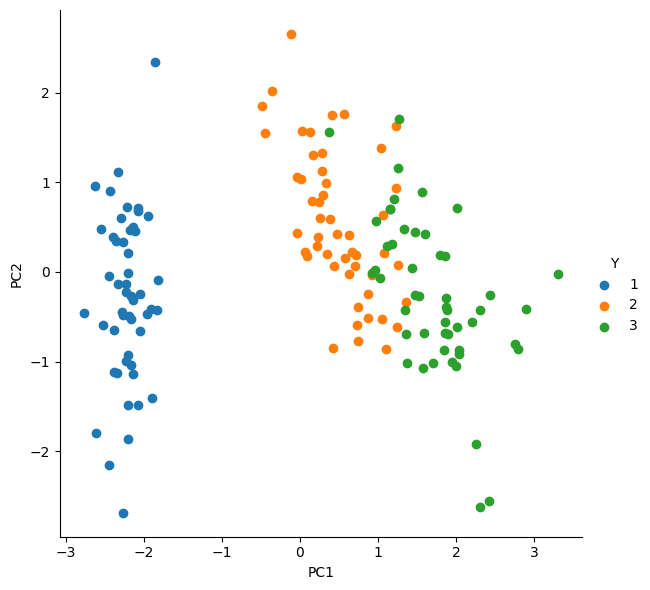

In [23]:
# a scatter plot is created using the Seaborn library's FacetGrid function.

# The FacetGrid function creates a grid of subplots and assigns the projections to the subplots. The hue parameter specifies the categorical variable to use for coloring the points, and the height parameter specifies the height of the plot.

# The map function is used to plot the scatter plot using the scatter function from Matplotlib's pyplot module. The add_legend function is used to add a legend to the plot.

import seaborn as sns

sns.FacetGrid(res, hue="Y", height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()